<H1>Migration velocity</H1>
<P> To compute the velocity of the trajectories of several particles, we generated a file with the 3D coordinates (Position X, Position Y and Position Z) acquired every 10 minutes. 

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read CSV file in pandas
csv = pd.read_csv('.data/Julie_R1_Bef_S4_cell123_Position.csv', skiprows=2) 
csv.head()

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,TrackID,ID,Unnamed: 9
0,22.9271,143.571,0.322853,um,Spot,Position,1,1000000000,0,NaN
1,30.4875,333.832,0.322853,um,Spot,Position,1,1000000001,1,NaN
2,24.3773,142.073,0.322853,um,Spot,Position,2,1000000000,2,NaN
3,33.3073,331.637,0.322853,um,Spot,Position,2,1000000001,3,NaN
4,26.3116,140.029,0.322853,um,Spot,Position,3,1000000000,4,NaN


<H2>Show basic file information</H2>

In [3]:
# get basic information
print('Number of samples %d'%len(csv))
print('Number of particles = %d'%len(csv['TrackID'].unique()))
print('Distance units = %s'%csv['Unit'][0])

Number of samples 318
Number of particles = 3
Distance units = um


In [4]:
# get TrackIDs
TrackID = csv['TrackID'].unique() 

# select only locations, sampling points and TrackIDs
df = csv[['Position X','Position Y', 'Position Z', 'Time','TrackID']]
         
df0 = df.loc[df['TrackID'] == TrackID[0]]
df1 = df.loc[df['TrackID'] == TrackID[1]]
df2 = df.loc[df['TrackID'] == TrackID[2]]

counter = 0
for i in TrackID:
    mysize =  len( df.loc[df['TrackID'] == i] )
    counter +=mysize
    print('Number of samples in TrackID = %d is %d'%(i,mysize))
    
print('Total number of samples %d'%counter)

df0.head() # show first values of first particle

Number of samples in TrackID = 1000000000 is 143
Number of samples in TrackID = 1000000001 is 144
Number of samples in TrackID = 1000000002 is 31
Total number of samples 318


,Position X,Position Y,Position Z,Time,TrackID
0,22.9271,143.571,0.322853,1,1000000000
2,24.3773,142.073,0.322853,2,1000000000
4,26.3116,140.029,0.322853,3,1000000000
6,28.0949,139.157,0.322853,4,1000000000
8,27.8202,138.594,0.322853,5,1000000000


In [5]:
# collect a list of 3d coordinates

P0 = zip(df0['Position X'], df0['Position Y'], df0['Position Z'])
P1 = zip(df1['Position X'], df1['Position Y'], df1['Position Z'])
P2 = zip(df2['Position X'], df2['Position Y'], df2['Position Z'])
P0[0] # test the values are correct

(22.927099999999999, 143.571, 0.322853)

<H2>Compute euclidian distances </H2>

In [6]:
def distance(myarray):
    """
    Calculate the distance between 2 3D coordinates along the 
    axis of the numpy array.
    
    """
    # slice() method is useful for large arrays
    # see diff in ./local/lib/python2.7/site-packages/numpy/lib/function_base.py
    a = asanyarray(myarray)
    nd = a.ndim
    slice1 = [slice(None)] # create a slice type object
    slice2 = [slice(None)]
    slice1[-1] = slice(1, None)  # like array[1:] 
    slice2[-1] = slice(None, -1) # like array[:-1]
    slice1 = tuple(slice1)
    slice2 = tuple(slice2)

    # calculate sqrt( dx^2 + dy^2 + dz^2)
    sum_squared = np.sum( np.power(a[slice2]-a[slice1],2), axis=1)
    return np.sqrt( sum_squared)

<H2>Velocities</H2>
<P>This is simply the distance if sampling time is constant </P>

In [7]:
# create time vector

time = np.concatenate(([0], df0['Time'].values)) # get sampling time points
dt = 10 # sampling interval in minutes
t0 = time*dt

print(t0)

[   0   10   20   30   40   50   60   70   80   90  100  110  120  130  140
  150  160  170  180  190  200  220  230  240  250  260  270  280  290  300
  310  320  330  340  350  360  370  380  390  400  410  420  430  440  450
  460  470  480  490  500  510  520  530  540  550  560  570  580  590  600
  610  620  630  640  650  660  670  680  690  700  710  720  730  740  750
  760  770  780  790  800  810  820  840  850  860  870  880  890  900  910
  920  930  940  950  960  970  980  990 1000 1010 1020 1030 1040 1050 1060
 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210
 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360
 1370 1380 1390 1400 1410 1420 1430 1440 1450]


In [8]:
D0 = distance(P0) # in um
S0 = D0/10.
t0 = t0[:-2] 

In [9]:
len(t0), len(S0)

(142, 142)

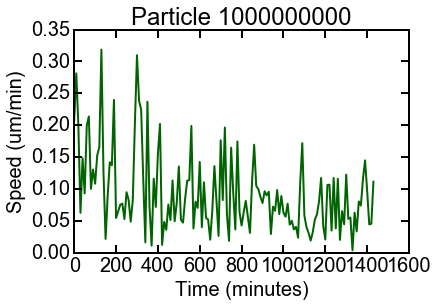

In [10]:
plt.plot(t0, S0, color = '#006400')

plt.ylabel('Speed (um/min)'), 
plt.xlabel('Time (minutes)')
plt.title('Particle %d'%TrackID[0]);


<H2>Particle information</H2>

In [30]:
print('Track duration %2.4f min'%(len(t0)*10.))
print('total traveled distances = %2.4f um'%np.sum(D0))
print('total average speed = %2.4f um/min'%S0.mean())

Track duration 1420.0000 min
total traveled distances = 133.6888 um
total average speed = 0.0941 um/min


In [12]:
# create time vector

time = np.concatenate(([0], df1['Time'].values)) # get sampling time points
dt = 10 # sampling interval in minutes
t1 = time*dt

print(t1)

[   0   10   20   30   40   50   60   70   80   90  100  110  120  130  140
  150  160  170  180  190  200  220  230  240  250  260  270  280  290  300
  310  320  330  340  350  360  370  380  390  400  410  420  430  440  450
  460  470  480  490  500  510  520  530  540  550  560  570  580  590  600
  610  620  630  640  650  660  670  680  690  700  710  720  730  740  750
  760  770  780  790  800  810  820  830  840  850  860  870  880  890  900
  910  920  930  940  950  960  970  980  990 1000 1010 1020 1030 1040 1050
 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200
 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350
 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450]


In [13]:
D1 = distance(P1) # in um
S1 = D1/10.
t1 = t1[:-2] 



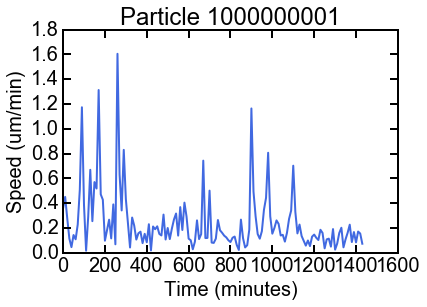

In [14]:
plt.plot(t1, S1, color = '#4169E1')
plt.ylabel('Speed (um/min)'), 
plt.xlabel('Time (minutes)')
plt.title('Particle %d'%TrackID[1]);

In [31]:


print('Track duration %2.4f min'%(len(t1)*10.))
print('total traveled distances = %2.4f um'%np.sum(D1))
print('total average speed = %2.4f um/min'%S1.mean())

Track duration 1430.0000 min
total traveled distances = 346.2176 um
total average speed = 0.2421 um/min


In [16]:
# create time vector

time = df2['Time'].values # get sampling time points
dt = 10 # sampling interval in minutes
t2 = time*dt

print(t2)


[1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280
 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430
 1450]


In [17]:
D2 = distance(P2) # in um
S2 = D2/10.
t2 = t2[:-1] 

In [18]:
len(t2), len(D2)

(30, 30)

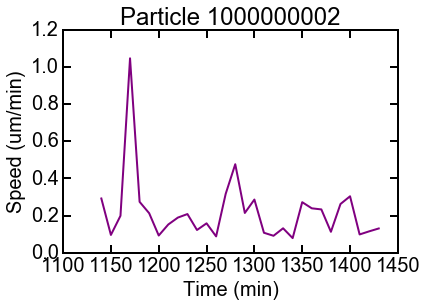

In [19]:
plt.plot(t2, S2, color = '#800080')
plt.xlabel('Time (min)')
plt.ylabel('Speed (um/min)'), plt.title('Particle %d'%TrackID[2]);

In [32]:
print('Track duration %2.4f min'%(len(t2)*10.))
print('total traveled distances = %2.4f um'%np.sum(D2))
print('total average speed = %2.4f um/min'%S2.mean())

Track duration 300.0000 min
total traveled distances = 66.0373 um
total average speed = 0.2201 um/min


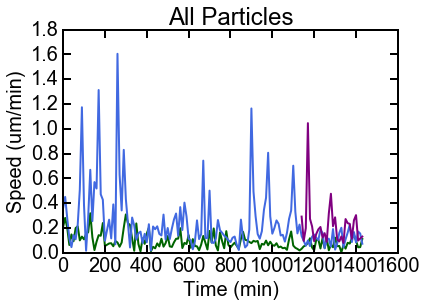

In [21]:
#Overlap
plt.plot(t0, S0, color = '#006400');
plt.plot(t1, S1, color = '#4169E1');
plt.plot(t2, S2, color = '#800080');
plt.xlabel('Time (min)');
plt.ylabel('Speed (um/min)'), plt.title('All Particles');

<H2>Show normalized speeds</H2>

In [22]:
S0_norm = S0/np.max(S0)
S1_norm = S1/np.max(S1)
S2_norm = S2/np.max(S2)


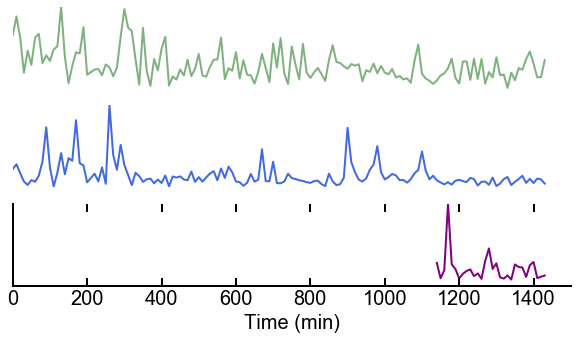

In [23]:
#Overlap


#plt.axis('off')
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(t0, S0_norm, color = '#006400', alpha=0.5)

ax2.plot(t1, S1_norm, color = '#4169E1')

ax3.plot(t2, S2_norm, color = '#800080')


ax3.set_xlabel('Time (min)');
for ax in fig.axes:
    ax.set_xlim(0,1500)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    #ax.axis('Off')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
ax3.get_xaxis().set_visible(True)
ax3.spines['bottom'].set_visible(True)
ax3.spines['left'].set_visible(True)
ax3.get_xaxis().set_ticks(np.arange(0,1500,200));

